# Q9
Benedrix, a machine tool company in interested in understand the impact of machine hours and production run, on its overhead cost. 
The data on a monthly basis for 3 years is provided in the dataset: MLR_Q09_FactoryOverhead
Link: https://drive.google.com/drive/folders/1ILKastUTJWccxaxIpJpjqCJDpsMJ-oC8

Fit the regression equations for the following:

    Overhead = F (machine hours)
    Overhead = F (production runs)
    Overhead = F (machine hours, production runs) 

Answer below questions:

    1)  Is production run strongly correlated with machine hours?
    2)  Find the R-Squared in all 3 cases. 
    3)  How would you explain the additional lift in R-squared of the combined model vs each of the individual model? 

In [17]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("MLR_Q09_FactoryOverhead.csv")
df.head()

,Month,Machine Hours,Production Runs,Overhead Cost
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968


## Data Exploration

In [15]:
import matplotlib.pyplot as plt

df[["Machine Hours", "Production Runs", "Overhead Cost"]].corr()

,Machine Hours,Production Runs,Overhead Cost
Machine Hours,1.000000,-0.229093,0.631885
Production Runs,-0.229093,1.000000,0.520544
Overhead Cost,0.631885,0.520544,1.000000


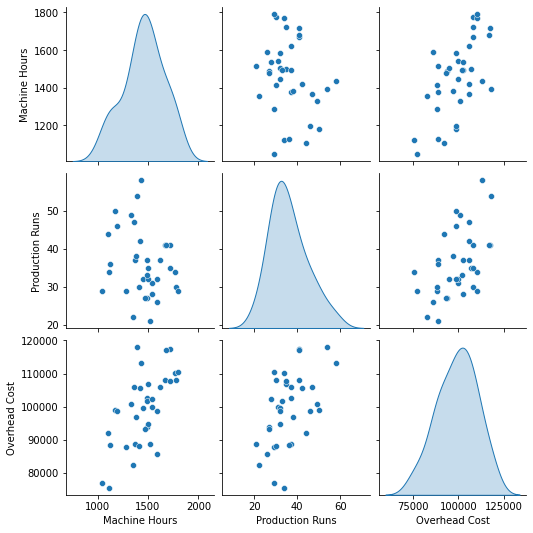

In [19]:
sns.pairplot(data = df[["Machine Hours", "Production Runs", "Overhead Cost"]], 
             diag_kind='kde')
plt.show()

In [7]:
def fit_lin_reg_with_intercept(X, Y):
    X = sm.add_constant(X) # adding a constan
    reg_model = sm.OLS(Y,X).fit()
    return reg_model

# Fit the regression equation, as asked

## Overhead = F (machine hours)

In [9]:
reg_model_1 = fit_lin_reg_with_intercept(X=df[["Machine Hours"]], Y=df[["Overhead Cost"]])
print(reg_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.57e-05
Time:                        06:43:39   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.862e+04   1.07e+04      4.533

## Overhead = F (production runs)

In [11]:
reg_model_2 = fit_lin_reg_with_intercept(X=df[["Production Runs"]], Y=df[["Overhead Cost"]])
print(reg_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Fri, 13 May 2022   Prob (F-statistic):            0.00114
Time:                        06:44:41   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.561e+04   6808.611     

## Overhead = F (machine hours, production runs) 

In [13]:
reg_model_3 = fit_lin_reg_with_intercept(X=df[["Machine Hours", "Production Runs"]], Y=df[["Overhead Cost"]])
print(reg_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.75e-15
Time:                        06:45:20   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3996.6782   6603.651     

## Answers

    1)  Is production run strongly correlated with machine hours?
    The correlation coefficient between the two is -0.21, wihch is very low correlation
    2)  Find the R-Squared in all 3 cases. 
        - 1st model R-squared is 0.399
        - 2nd model R-squared is 0.271
        - 3rd model R-squared is 0.866
    3)  How would you explain the additional lift in R-squared of the combined model vs each of the individual model? 
    Its because both independent variables are correlated with dependent variable, but they dont have much correlation among themselves. Due to this when we add the two variables, the model is improving